In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", None)

In [4]:
file_path = "../data/newsCorpora.csv"
df = pd.read_csv(
    file_path,
    delimiter="\t",
    header=None,
    names=[
        "ID",
        "Title",
        "URL",
        "Publisher",
        "Category",
        "Story",
        "Hostname",
        "Timestamp",
    ],
)

In [5]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         422419 non-null  int64 
 1   Title      422419 non-null  object
 2   URL        422419 non-null  object
 3   Publisher  422417 non-null  object
 4   Category   422419 non-null  object
 5   Story      422419 non-null  object
 6   Hostname   422419 non-null  object
 7   Timestamp  422419 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 25.8+ MB
None


In [6]:
#check if all observation are unique
print("Check if all observations are unique:")
print(df["ID"].is_unique)

Check if all observations are unique:
True


In [7]:
print("\nFirst 5 rows of the dataset:")
print(df.head())



First 5 rows of the dataset:
   ID                                                                  Title  \
0   1   Fed official says weak data caused by weather, should not slow taper   
1   2     Fed's Charles Plosser sees high bar for change in pace of tapering   
2   3  US open: Stocks fall after Fed official hints at accelerated tapering   
3   4             Fed risks falling 'behind the curve', Charles Plosser says   
4   5                     Fed's Plosser: Nasty Weather Has Curbed Job Growth   

                                                                                                                           URL  \
0  http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss   
1     http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html   
2                  http://www.ifamagazine.com/news/us-open-stocks-fall-after-fed-official-hints-at-

In [8]:
print("\nSummary Statistics for ID:")
print(df['ID'].describe())
print("\n all ids unique: " +str (df['ID'].count() == df['ID'].nunique()))


Summary Statistics for ID:
count    422419.000000
mean     211536.764594
std      122102.839707
min           1.000000
25%      105801.500000
50%      211655.000000
75%      317273.500000
max      422937.000000
Name: ID, dtype: float64

 all ids unique: True


In [9]:
print("\nSummary Statistics for Title:")
print(df['Title'].describe())


Summary Statistics for Title:
count                                                                                 422419
unique                                                                                406455
top       The article requested cannot be found! Please refresh your browser or go back  ...
freq                                                                                     145
Name: Title, dtype: object


In [10]:
#show observation with same Title
print("\nObservation with same Title:")
duplicate_titles = df[df['Title'].duplicated(keep=False)]
print(duplicate_titles.sort_values(by='Title').head(10))


Observation with same Title:
            ID  \
62792    62793   
79195    79271   
381027  381487   
385582  386042   
20352    20353   
23989    23990   
373651  374111   
369790  370250   
46339    46340   
41242    41243   

                                                                                 Title  \
62792               #CancelColbert: Stephen Colbert accused of racism over Asian tweet   
79195               #CancelColbert: Stephen Colbert accused of racism over Asian tweet   
381027                      #NerdNews: Marvel Comics Picks A Woman To Be The Next Thor   
385582                      #NerdNews: Marvel Comics Picks A Woman To Be The Next Thor   
20352   $1 billion worth of brain scans ordered for headache sufferers in US each year   
23989   $1 billion worth of brain scans ordered for headache sufferers in US each year   
373651                                     $10 potato salad idea nets more than $36000   
369790                                     $10 pota

In [11]:
print("\nSummary Statistics for URL:")
print(df['URL'].describe())


Summary Statistics for URL:
count                                                                                                                                                                                                                                                     422419
unique                                                                                                                                                                                                                                                    422223
top       http://www.japantimes.co.jp/news/2014/04/18/world/adults-bullied-as-kids-still-affected-socially-economically-years-later/\?utm_source=rss&amp;utm_medium=rss&amp;utm_campaign=adults-bullied-as-kids-still-affected-socially-economically-years-later
freq                                                                                                                                                                                                    

In [12]:
print("\nSummary Statistics for Publisher:")
print(df['Publisher'].describe())


Summary Statistics for Publisher:
count      422417
unique      10985
top       Reuters
freq         3902
Name: Publisher, dtype: object


In [13]:
print("\nSummary Statistics for Category:")
print(df['Category'].describe())


Summary Statistics for Category:
count     422419
unique         4
top            e
freq      152469
Name: Category, dtype: object


In [14]:
print("\nSummary Statistics for Story:")
print(df['Story'].describe())


Summary Statistics for Story:
count                            422419
unique                             7230
top       dubwcJArLL_qAKML5LGPLiunKzNLM
freq                                450
Name: Story, dtype: object


In [15]:
print("\nSummary Statistics for Hostname:")
print(df['Hostname'].describe())


Summary Statistics for Hostname:
count             422419
unique             11236
top       in.reuters.com
freq                2877
Name: Hostname, dtype: object


In [16]:
print("\nSummary Statistics for Timestamp:")
print("Min Timestamp:", pd.to_datetime((df['Timestamp']).min(), unit='ms'))
print("Max Timestamp:", pd.to_datetime((df['Timestamp']).max(), unit='ms'))


Summary Statistics for Timestamp:
Min Timestamp: 2014-03-10 16:52:50.698000
Max Timestamp: 2014-08-28 12:33:11.565000


In [17]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ID           0
Title        0
URL          0
Publisher    2
Category     0
Story        0
Hostname     0
Timestamp    0
dtype: int64


In [18]:
#check obs with null values

print(df['Publisher'].nunique())
print(df[df['Publisher'].isnull()])


10985
          ID                                               Title  \
4556    4557  Federal Prosecutors Want Cash From Denver Pot Grow   
14203  14204                Honda Recalls Nearly 900000 Minivans   

                                                                                             URL  \
4556   http://denver.cbslocal.com/2014/03/10/federal-prosecutors-want-cash-from-denver-pot-grow/   
14203                     http://dfw.cbslocal.com/2014/03/16/honda-recalls-nearly-900k-minivans/   

      Publisher Category                          Story             Hostname  \
4556        NaN        b  d__jcKruuebDhTMfkhbUJpI3MBjEM  denver.cbslocal.com   
14203       NaN        t  dRxWun-PlDEkGpMTSH5m3mrA0rO2M     dfw.cbslocal.com   

           Timestamp  
4556   1394565833004  
14203  1395062073951  


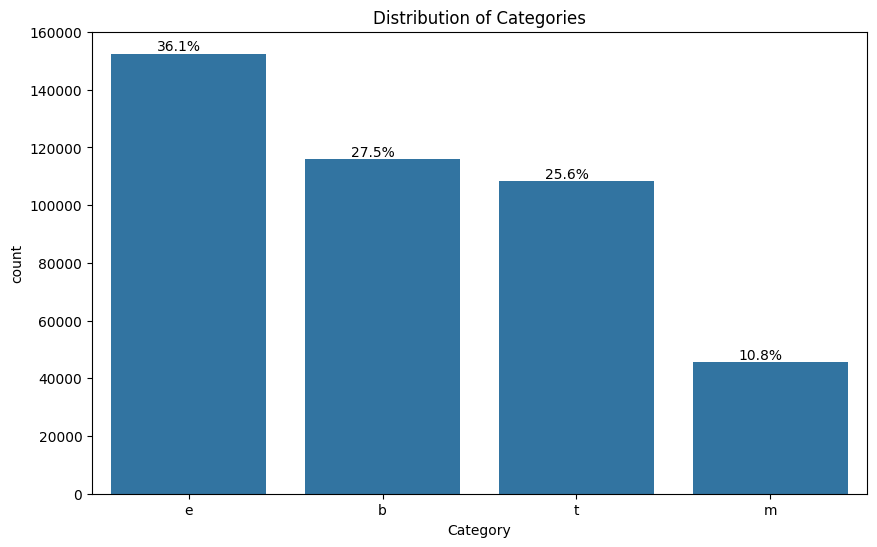

In [19]:
# Plot of Distribution of categories with % of each category

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Distribution of Categories')

# Annotate bars with percentage values
for p in ax.patches:
    percentage = f'{100 * p.get_height() / len(df):.1f}%'
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

#data doesnt seems to be higlhy imbalanced

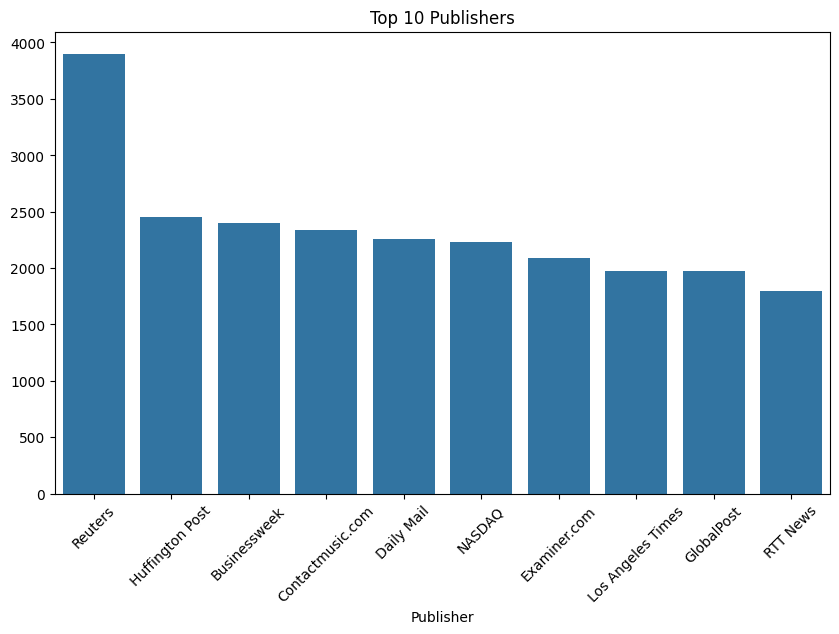

In [20]:

# Distribution of publishers
plt.figure(figsize=(10, 6))
top_publishers = df['Publisher'].value_counts().nlargest(10)
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.title('Top 10 Publishers')
plt.xticks(rotation=45)
plt.show()



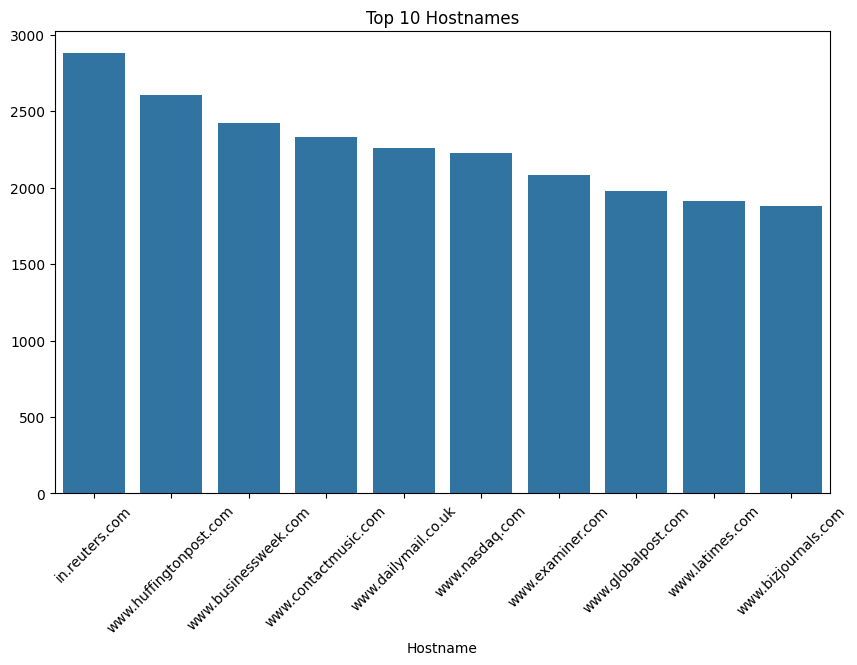

In [21]:
# Distribution of hostnames
plt.figure(figsize=(10, 6))
top_publishers = df['Hostname'].value_counts().nlargest(10)
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.title('Top 10 Hostnames')
plt.xticks(rotation=45)
plt.show()

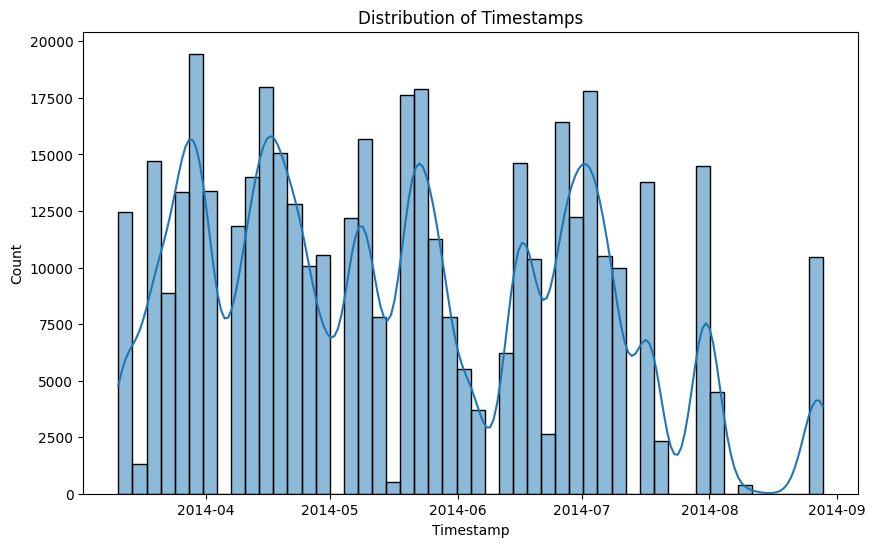

In [22]:
# Distribution of timestamps
plt.figure(figsize=(10, 6))
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
sns.histplot(df['Timestamp'], bins=50, kde=True)
plt.title('Distribution of Timestamps')
plt.show()

In [23]:
# Ensure the dataset is read correctly
assert df["Title"].dtype == object, "Title column should be of type object (text)"
assert df["Category"].dtype == object, "Category column should be of type object (text)"
assert set(df["Category"].unique()).issubset({"b", "t", "e", "m"}), "Category column should contain only 'b', 't', 'e', 'm'"

In [24]:
# Show unique values of the Story column
print("\nUnique values of Story:")
unique_stories = df['Story'].unique()
print(unique_stories)


Unique values of Story:
['ddUyU0VZz0BRneMioxUPQVP6sIxvM' 'dPhGU51DcrolUIMxbRm0InaHGA2XM'
 'dxyGGb4iN9Cs9aMZTKQpJeoiQfruM' ... 'dBVS5US1PZ9v2EMxNEdykF9V-7PCM'
 'dhhnSHVoyA7ENBM3boDX_D_-3PV6M' 'dpcLMoJD69UYMXMxaoEFnWql9YjQM']


In [25]:
# Save unique values to stories.txt
with open('stories.txt', 'w') as file:
    for story in unique_stories:
        file.write(f"{story}\n")

print("Unique stories have been saved to stories.txt")

Unique stories have been saved to stories.txt
